### IMPORTING THE DEPENDANCIES AND LIBRARIES

In [1]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme("onedork")

In [2]:
!pip install plotly
!pip install wordcloud 
!pip install scikit-image

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import wordCloud

### EXPLORING THE DATA

In [4]:
# reading the csv file into the jupyter notebook
df = pd.read_csv("https://pythonandvba.com/youtube-data.csv")

In [5]:
# geetting the general outlook of the data based on five samples
df.sample(5)

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
103,GGfvTFA7ZlI,Quick Tip: Excel VBA Debugging,4-Jan-21,2,68.05,14,621,17069,2.01
54,Cfb0AXCuPqw,Read Messy & Poorly Structured Excel Files Usi...,20-Feb-21,20,32.56,196,5555,61932,5.12
60,4SO3CUWPYf0,Deploy Your Streamlit App To Render (Free Hero...,17-Sep-22,18,28.15,142,2238,39804,3.54
95,TQWwaLqtpq4,How To Create A Waterfall Chart In Python Usin...,15-Aug-20,5,25.68,62,2307,48830,2.35
78,DJJdikCk09A,"Excel SUMIFS, COUNTIFS & AVERAGEIFS in PYTHON ...",12-Jun-21,9,49.77,105,3584,34991,4.51


In [6]:
# Shape of the data
df.shape

(107, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Content                             107 non-null    object 
 1   Video title                         107 non-null    object 
 2   Video publish time                  102 non-null    object 
 3   Comments added                      107 non-null    int64  
 4   Average percentage viewed (%)       107 non-null    float64
 5   Likes                               107 non-null    int64  
 6   Views                               107 non-null    int64  
 7   Impressions                         107 non-null    int64  
 8   Impressions click-through rate (%)  106 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.6+ KB


In [8]:
# Finding if there are missing values
df.isna().sum()

Content                               0
Video title                           0
Video publish time                    5
Comments added                        0
Average percentage viewed (%)         0
Likes                                 0
Views                                 0
Impressions                           0
Impressions click-through rate (%)    1
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
# finding the percentage of missing value
df.isna().mean().mul(100)

Content                               0.000000
Video title                           0.000000
Video publish time                    4.672897
Comments added                        0.000000
Average percentage viewed (%)         0.000000
Likes                                 0.000000
Views                                 0.000000
Impressions                           0.000000
Impressions click-through rate (%)    0.934579
dtype: float64

In [11]:
# Getting the cells with the mssing value
df[df.isna().any(axis = "columns")]

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
94,8E4se9Ah5o8,MyToolBelt Installation,NaN,5,72.18,22,1309,13,0.00
96,V3Csrk--laM,Create Invoice Filepath,NaN,5,70.11,1,16,5,0.00
100,RnTqlKzQhRY,PySimpleGUI Retrieve Data,NaN,4,85.97,6,182,78,2.56
105,l4Dd1xLfNVY,xlwings - demo,NaN,0,102.23,0,3,0,NaN
106,pqIjey6Cbhw,"How to resolve ""pytube.exceptions.RegexMatchEr...",NaN,0,44.91,0,13,3,0.00


In [12]:
# the statistics on the numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Comments added,107.0,37.242991,8.952683e+01,0.00,8.500,21.000,33.50,885.00
Average percentage viewed (%),107.0,33.751963,1.656613e+01,12.62,23.545,28.910,38.79,102.23
Likes,107.0,417.859813,1.081007e+03,0.00,92.500,203.000,352.50,10175.00
Views,107.0,17792.682243,5.070927e+04,3.00,2582.000,6382.000,12968.50,442044.00
Impressions,107.0,249785.196262,1.133092e+06,0.00,43961.000,79838.000,132846.50,11550064.00
Impressions click-through rate (%),106.0,4.461509,2.057426e+00,0.00,3.060,4.175,5.73,10.86


In [13]:
# inspect hghest average percentage
df_best = df.sort_values("Average percentage viewed (%)", ascending=False)[:5]

df_best

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
105,l4Dd1xLfNVY,xlwings - demo,NaN,0,102.23,0,3,0,NaN
100,RnTqlKzQhRY,PySimpleGUI Retrieve Data,NaN,4,85.97,6,182,78,2.56
89,HYl-gftg9Rw,How To Save Cookies & Login Data In Selenium V...,21-Sep-21,6,81.96,46,2436,325,3.38
75,0_HlInz6HuM,"How To Remove “Made with Streamlit”, Hamburger...",22-Jul-21,10,78.33,115,3708,31197,3.57
99,JaPj_gOTg6M,Pull Stock Data & Export It To Excel Using Pyt...,6-Mar-21,4,73.26,89,1961,37686,2.76


In [14]:
# method 2 of finding the largest cells based on the percentage viewd
df.nlargest(5, columns=["Average percentage viewed (%)"])

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
105,l4Dd1xLfNVY,xlwings - demo,NaN,0,102.23,0,3,0,NaN
100,RnTqlKzQhRY,PySimpleGUI Retrieve Data,NaN,4,85.97,6,182,78,2.56
89,HYl-gftg9Rw,How To Save Cookies & Login Data In Selenium V...,21-Sep-21,6,81.96,46,2436,325,3.38
75,0_HlInz6HuM,"How To Remove “Made with Streamlit”, Hamburger...",22-Jul-21,10,78.33,115,3708,31197,3.57
99,JaPj_gOTg6M,Pull Stock Data & Export It To Excel Using Pyt...,6-Mar-21,4,73.26,89,1961,37686,2.76


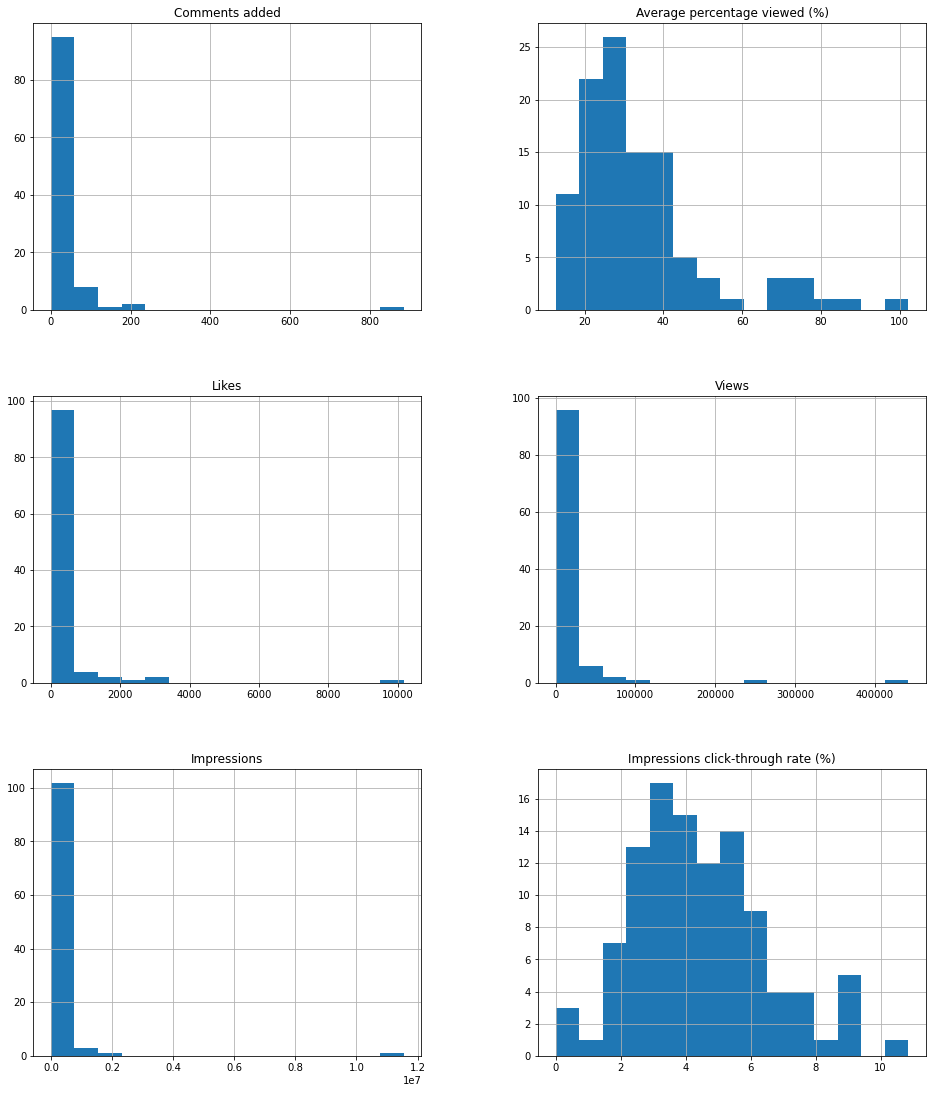

In [15]:
# Getting the histogram distribution oof all the columns in the dataframe
hist = df.hist(bins = 15, figsize=(16,19))

In [16]:
# Checking the correlation of the columns
df.corr().style.background_gradient(cmap = "RdBu", vmin=-1, vmax=1)

,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
Comments added,1.000000,-0.141652,0.484353,0.672014,0.362981,0.224351
Average percentage viewed (%),-0.141652,1.000000,-0.202818,-0.189377,-0.163310,-0.241190
Likes,0.484353,-0.202818,1.000000,0.958418,0.958740,0.079380
Views,0.672014,-0.189377,0.958418,1.000000,0.923668,0.134627
Impressions,0.362981,-0.163310,0.958740,0.923668,1.000000,-0.015123
Impressions click-through rate (%),0.224351,-0.241190,0.079380,0.134627,-0.015123,1.000000


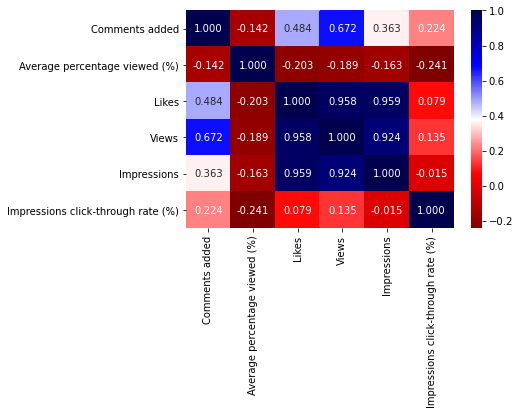

In [17]:
#By using a heatmap to check correlation
heatmap = sns.heatmap(df.corr(), cmap = "seismic_r", annot=True, fmt=".3F")

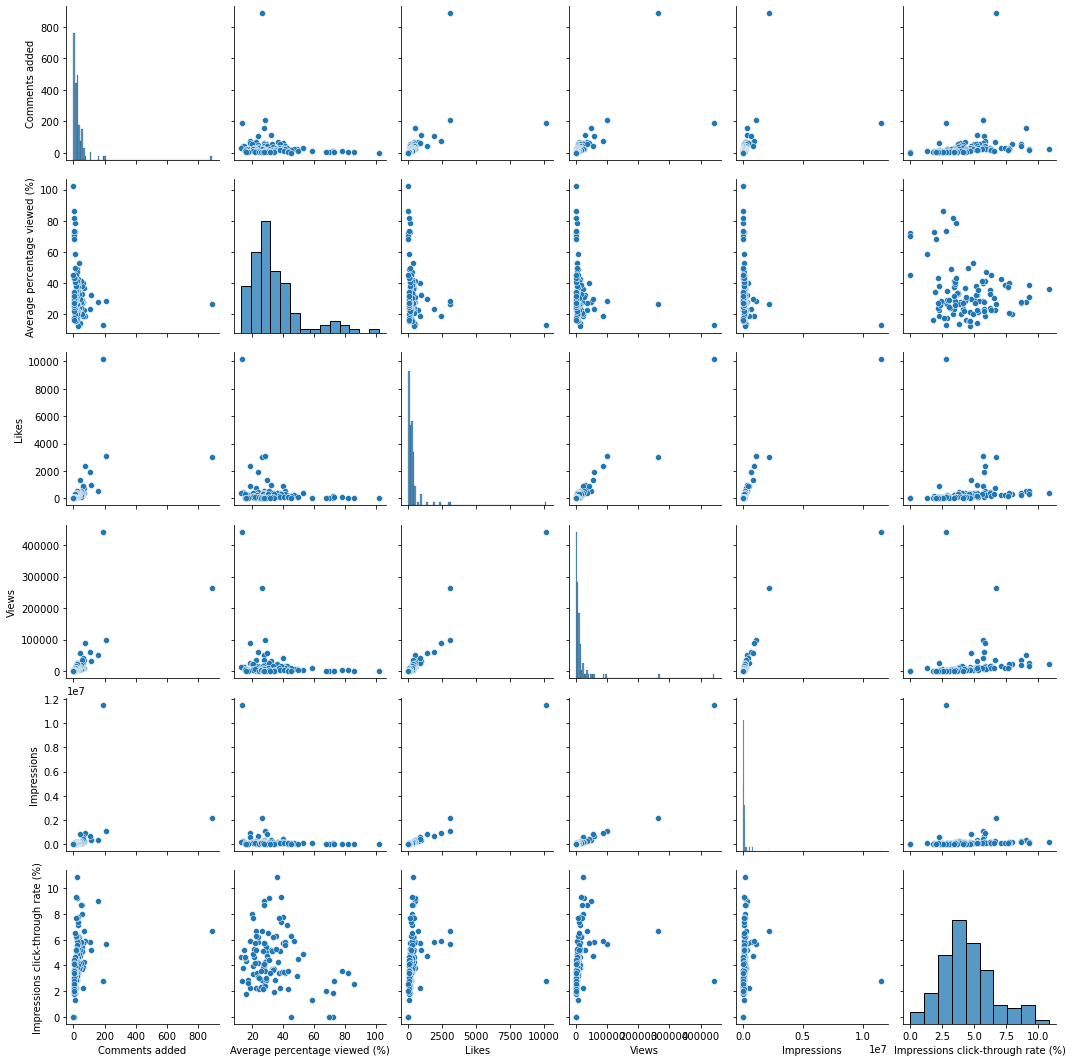

In [18]:
# Plotting thepairrwise correlation
sns.pairplot(df)

In [19]:
# Showing the outlieres
df["Views"].nlargest(10)

2     442044
0     265002
1      99259
6      88223
5      59870
23     56273
3      50270
11     42471
17     35044
8      34943
Name: Views, dtype: int64

In [20]:
# seting the upper limit for the outlier
v_o = df["Views"].quantile(0.99)
v_o

255057.41999999963

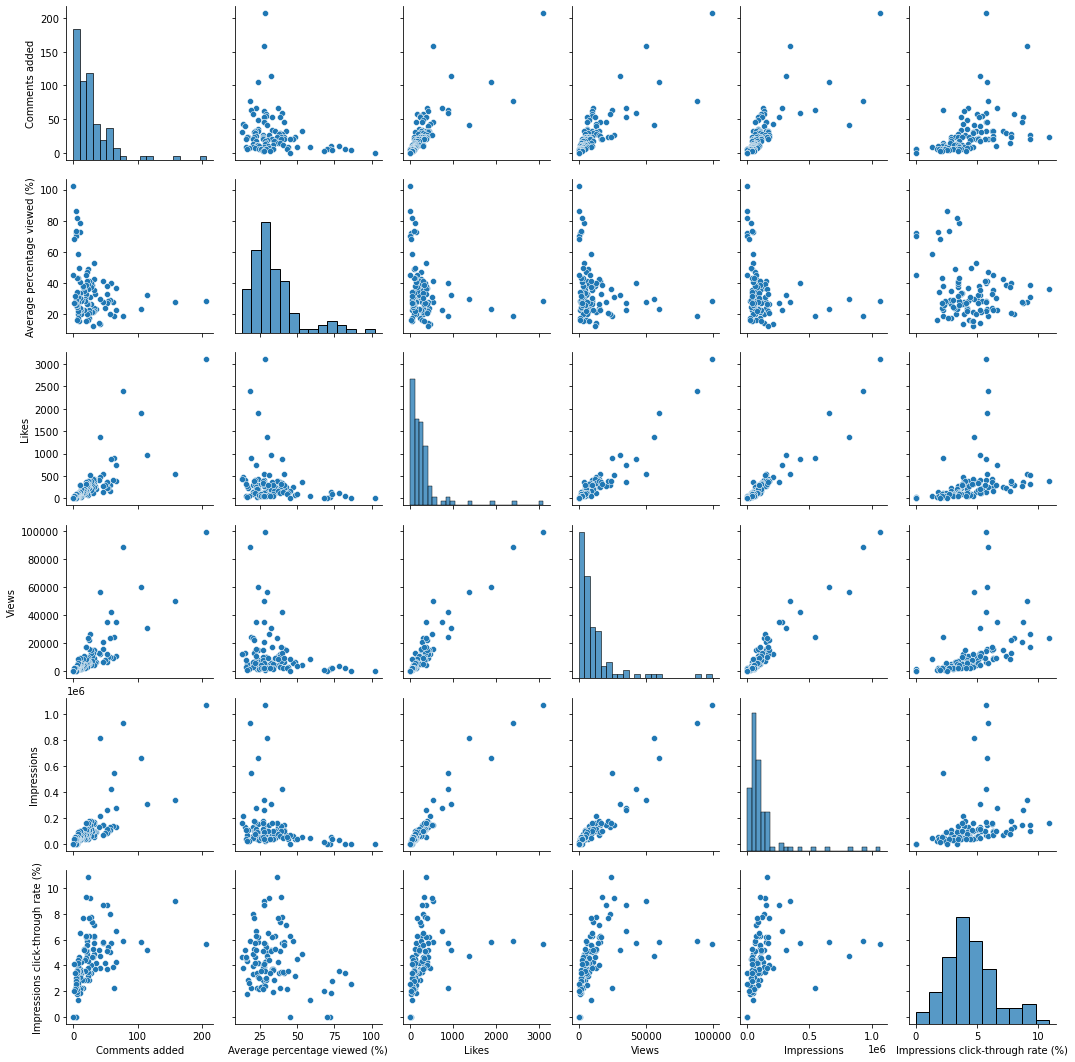

In [21]:
# plotting thte pairwise relationship without the outliers
sns.pairplot(df.query("Views < @v_o"))

### CLEANING THE DATA

In [22]:
df.sample(5)

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
95,TQWwaLqtpq4,How To Create A Waterfall Chart In Python Usin...,15-Aug-20,5,25.68,62,2307,48830,2.35
90,InVKYPK73vg,Export a Pandas Dataframe to Excel with Docume...,1-Aug-22,6,33.42,96,2111,39605,3.66
22,3egaMfE9388,Build A Streamlit Web App From Scratch (incl. ...,26-Jun-22,42,13.86,468,12591,211262,3.82
83,pms52_-cmc8,Create A Pandas Dataframe Right Inside Excel,4-Sep-21,8,43.51,124,3001,35641,3.56
55,WlQ7t0fC5Gs,Python: Copy Data From Multiple Files to Maste...,17-Jul-21,20,33.21,373,17039,163722,6.22


In [23]:

df.head()

,Content,Video title,Video publish time,Comments added,Average percentage viewed (%),Likes,Views,Impressions,Impressions click-through rate (%)
0,Wn9L1MD_y0Y,How To Send WhatsApp Messages From Excel Using...,19-Dec-20,885,26.36,3057,265002,2152704,6.71
1,svcv8uub0D0,How to Create an Excel Data Entry Form in 10 M...,22-May-21,207,28.48,3112,99259,1069755,5.70
2,Sb0A9i6d320,Turn An Excel Sheet Into An Interactive Dashbo...,11-Sep-21,192,13.14,10175,442044,11550064,2.79
3,VwzaNjpcEZ0,Send BULK SMS From Your OWN Number Using EXCEL...,10-Jul-21,158,27.57,537,50270,341500,9.04
4,nJHrSvYxzjE,Deploy Your Streamlit Web App on Heroku For Fr...,20-Mar-21,114,32.44,966,30941,308074,5.22


In [24]:
#changing the columns into the right format
df.columns = df.columns.str.lower()

df.head()

,content,video title,video publish time,comments added,average percentage viewed (%),likes,views,impressions,impressions click-through rate (%)
0,Wn9L1MD_y0Y,How To Send WhatsApp Messages From Excel Using...,19-Dec-20,885,26.36,3057,265002,2152704,6.71
1,svcv8uub0D0,How to Create an Excel Data Entry Form in 10 M...,22-May-21,207,28.48,3112,99259,1069755,5.70
2,Sb0A9i6d320,Turn An Excel Sheet Into An Interactive Dashbo...,11-Sep-21,192,13.14,10175,442044,11550064,2.79
3,VwzaNjpcEZ0,Send BULK SMS From Your OWN Number Using EXCEL...,10-Jul-21,158,27.57,537,50270,341500,9.04
4,nJHrSvYxzjE,Deploy Your Streamlit Web App on Heroku For Fr...,20-Mar-21,114,32.44,966,30941,308074,5.22


In [25]:
df.columns = df.columns.str.replace(" ","_")

In [26]:
 remove_nan_values =["video_publish_time", "impressions_click-through_rate_(%)"]
 remove_cols = ["content"]

df.drop(labels=remove_cols, axis ="columns",inplace = True)

df.dropna(subset = remove_nan_values, inplace = True)

df.head(5)


,video_title,video_publish_time,comments_added,average_percentage_viewed_(%),likes,views,impressions,impressions_click-through_rate_(%)
0,How To Send WhatsApp Messages From Excel Using...,19-Dec-20,885,26.36,3057,265002,2152704,6.71
1,How to Create an Excel Data Entry Form in 10 M...,22-May-21,207,28.48,3112,99259,1069755,5.70
2,Turn An Excel Sheet Into An Interactive Dashbo...,11-Sep-21,192,13.14,10175,442044,11550064,2.79
3,Send BULK SMS From Your OWN Number Using EXCEL...,10-Jul-21,158,27.57,537,50270,341500,9.04
4,Deploy Your Streamlit Web App on Heroku For Fr...,20-Mar-21,114,32.44,966,30941,308074,5.22


In [27]:
replace ={"impressions_click-through_rate_(%)": "impressions_ctr_pct",
                    "average_percentage_viewed_(%)": "average_viewed_pct"}
df.rename(columns = replace)

,video_title,video_publish_time,comments_added,average_viewed_pct,likes,views,impressions,impressions_ctr_pct
0,How To Send WhatsApp Messages From Excel Using...,19-Dec-20,885,26.36,3057,265002,2152704,6.71
1,How to Create an Excel Data Entry Form in 10 M...,22-May-21,207,28.48,3112,99259,1069755,5.70
2,Turn An Excel Sheet Into An Interactive Dashbo...,11-Sep-21,192,13.14,10175,442044,11550064,2.79
3,Send BULK SMS From Your OWN Number Using EXCEL...,10-Jul-21,158,27.57,537,50270,341500,9.04
4,Deploy Your Streamlit Web App on Heroku For Fr...,20-Mar-21,114,32.44,966,30941,308074,5.22
...,...,...,...,...,...,...,...,...
99,Pull Stock Data & Export It To Excel Using Pyt...,6-Mar-21,4,73.26,89,1961,37686,2.76
101,Add a snowflake animation to your streamlit we...,24-Dec-21,3,27.17,58,2087,52669,2.15
102,How To Create A GUI Program In Python Using Tk...,13-Sep-20,3,31.51,46,1994,37525,3.43
103,Quick Tip: Excel VBA Debugging,4-Jan-21,2,68.05,14,621,17069,2.01


In [28]:
from datetime import datetime

In [29]:
df["video_publish_time"]= pd.to_datetime(df.video_publish_time)
df["day_of_the_week_published"] = pd.to_datetime(df.video_publish_time).dt.dayofweek
df["days_since_published"] = (pd.to_datetime("today") - pd.to_datetime(df.video_publish_time)).dt.days.astype(int)
df["likes_per_day"] = (df.likes/df.days_since_published).round(2)
df["likes_to_view_ratio_pct"] = ((df.likes/df.views)*100).round(2)
df["comments_to_views_ratio_pct"] = ((df.comments_added / df.views)*100).round(2)
                   

In [30]:
df.shape

(102, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 104
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   video_title                         102 non-null    object        
 1   video_publish_time                  102 non-null    datetime64[ns]
 2   comments_added                      102 non-null    int64         
 3   average_percentage_viewed_(%)       102 non-null    float64       
 4   likes                               102 non-null    int64         
 5   views                               102 non-null    int64         
 6   impressions                         102 non-null    int64         
 7   impressions_click-through_rate_(%)  102 non-null    float64       
 8   day_of_the_week_published           102 non-null    int64         
 9   days_since_published                102 non-null    int32         
 10  likes_per_day             

In [32]:
df["day_of_the_week_published"].unique()

array([5, 6, 3, 0, 4, 1], dtype=int64)

In [33]:
df["day_of_the_week_published"].value_counts()

5    63
6    22
4     6
0     5
3     4
1     2
Name: day_of_the_week_published, dtype: int64

In [34]:
#df.drop(columns = ["video_publish_time"], axis = 1, inplace = True)
df.sample(5)

,video_title,video_publish_time,comments_added,average_percentage_viewed_(%),likes,views,impressions,impressions_click-through_rate_(%),day_of_the_week_published,days_since_published,likes_per_day,likes_to_view_ratio_pct,comments_to_views_ratio_pct
97,Create Hand Drawn Charts In Excel Using Python...,2020-12-12,5,28.11,48,904,19385,2.40,5,859,0.06,5.31,0.55
36,Replace Excel Vlookup in Python Using Pandas (...,2021-02-27,28,40.09,345,13245,115902,7.77,5,782,0.44,2.60,0.21
53,Python: How to Loop Through Folders and Subfol...,2021-11-13,21,41.33,308,9416,100508,5.63,5,523,0.59,3.27,0.22
23,How To Automate Excel Using Python | Combine F...,2020-11-30,41,29.69,1377,56273,816995,4.77,0,871,1.58,2.45,0.07
34,Export Pandas DataFrames to new & existing Exc...,2022-01-29,30,38.72,231,11057,89409,7.40,5,446,0.52,2.09,0.27


In [35]:
# numberof clicks of each videoe
#number_of_clicks = df.impressions * df.impressions_click-through_rate_(%)
df["clicks"] = ((df["impressions"] * df["impressions_click-through_rate_(%)"])/100).astype(int)

df.sample(3)

,video_title,video_publish_time,comments_added,average_percentage_viewed_(%),likes,views,impressions,impressions_click-through_rate_(%),day_of_the_week_published,days_since_published,likes_per_day,likes_to_view_ratio_pct,comments_to_views_ratio_pct,clicks
65,How to Merge Excel Files with Different Header...,2022-02-12,15,38.20,125,3068,64414,2.25,5,432,0.29,4.07,0.49,1449
93,📈 How To Create A Candlestick Chart In Python ...,2020-09-20,6,25.53,92,4666,54793,3.54,6,942,0.10,1.97,0.13,1939
23,How To Automate Excel Using Python | Combine F...,2020-11-30,41,29.69,1377,56273,816995,4.77,0,871,1.58,2.45,0.07,38970


In [36]:
df.columns

Index(['video_title', 'video_publish_time', 'comments_added',
       'average_percentage_viewed_(%)', 'likes', 'views', 'impressions',
       'impressions_click-through_rate_(%)', 'day_of_the_week_published',
       'days_since_published', 'likes_per_day', 'likes_to_view_ratio_pct',
       'comments_to_views_ratio_pct', 'clicks'],
      dtype='object')

In [37]:
df = df.reindex(columns = ['video_title','video_publish_time','day_of_the_week_published','days_since_published', 'views', "clicks", 'likes',"comments_added",'impressions','average_percentage_viewed_(%)','likes_per_day','likes_to_view_ratio_pct', 'comments_to_views_ratio_pct', 'impressions_click-through_rate_(%)'])

df.sample(4)

,video_title,video_publish_time,day_of_the_week_published,days_since_published,views,clicks,likes,comments_added,impressions,average_percentage_viewed_(%),likes_per_day,likes_to_view_ratio_pct,comments_to_views_ratio_pct,impressions_click-through_rate_(%)
61,How to Send Push Notifications to Your Phone U...,2021-06-19,5,670,4498,2266,109,17,42919,35.28,0.16,2.42,0.38,5.28
47,How To Create A Word Cloud In Python | Tutoria...,2020-08-30,6,963,23941,17653,377,23,162555,36.11,0.39,1.57,0.10,10.86
42,Integrate Lottie Animations Inside Your Stream...,2021-08-28,5,600,6600,3656,239,24,106598,41.32,0.40,3.62,0.36,3.43
49,Run SQL queries in EXCEL (just like a normal E...,2022-08-07,6,256,8268,5849,338,22,114705,27.14,1.32,4.09,0.27,5.10


In [38]:
df.shape

(102, 14)

In [39]:
df["video_title"].nunique()

102

### PLOTING THE DATA

#### Time Series Analysis

<AxesSubplot:xlabel='video_publish_time'>

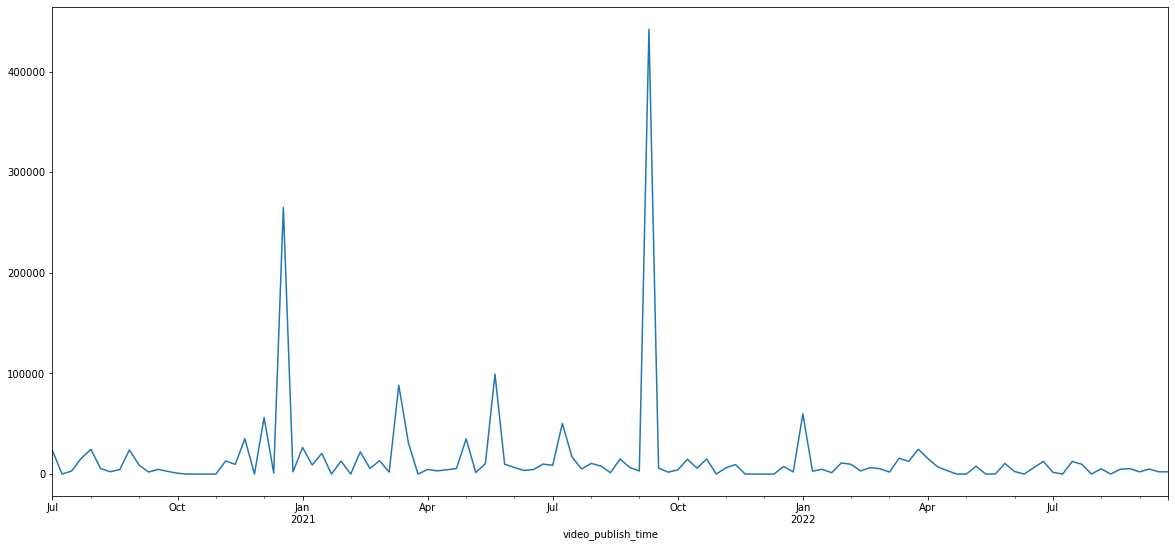

In [49]:
(df
 .set_index("video_publish_time")
 .sort_index()
 .views
 .resample("w")
 .mean()
 .fillna(0)
 .plot(figsize=(20,9))
)

In [55]:
def plot_timeseries(df, columns):
    df = df.set_index("video_publish_time").sort_index()
    fig = px.line(
        df,
        x=df.index,
        y=columns,
        template="simple_white",
        hover_name="video_title",
        title=f"Development: {', '.join(columns).title()}",
    )
    fig.update_layout(hovermode="x unified", margin=dict(l=0, r=0, t=50, b=5))
    return fig

fig = plot_timeseries(df=df, columns=["views", "likes", "comments_added","clicks","impressions"])
fig.show()

In [57]:
def plot_column(df, column, top_values=10, color="#d33682"):
    df = df.nlargest(top_values, columns=column).sort_values(by=column)
    title = f"<b>{column.replace('_',' ').replace('pct','%').title()} - Top {top_values} videos</b>"
    mean = df[column].mean()
    median = df[column].median()

    fig = px.bar(
        df,
        x=column,
        y="video_title",
        orientation="h",
        title=title,
        color_discrete_sequence=[color] * top_values,
        template="plotly_white",
        text=column,
    )
    # add a vertical "mean" line
    fig.add_vline(
        x=mean,
        line_color="gray",
        line_width=3,
        opacity=1,
        line_dash="dot",
        annotation_position="top",
        annotation=dict(text="<i>mean</i>", font_size=12, font_color="gray"),
    )
    # add a vertical "mediam" line
    fig.add_vline(
        x=median,
        line_color="salmon",
        line_width=3,
        opacity=1,
        line_dash="dot",
        annotation_position="bottom",
        annotation=dict(text="<i>median</i>", font_size=12, font_color="salmon"),
    )
    fig.update_layout(
        plot_bgcolor="rgba(0,0,0,0)",
        yaxis=(dict(showgrid=False, title=None)),
        xaxis=(dict(showgrid=False, title=None, showticklabels=False)),
        margin=dict(l=0, r=0, t=50, b=5),
    )
    return fig

In [58]:
# print all numeric columns
df.select_dtypes('number').columns.to_list()

['day_of_the_week_published',
 'days_since_published',
 'views',
 'clicks',
 'likes',
 'comments_added',
 'impressions',
 'average_percentage_viewed_(%)',
 'likes_per_day',
 'likes_to_view_ratio_pct',
 'comments_to_views_ratio_pct',
 'impressions_click-through_rate_(%)']

In [59]:
fig = plot_column(df=df, column="likes_to_view_ratio_pct", top_values=8)
fig.show()
# Optional: Export the chart to a standalone HTML file
fig.write_html("chart.html")

NameError: name 'WordCloud' is not defined